# Boston House Price Prediction

https://www.kaggle.com/c/boston-housing

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - percentage lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

## Load the dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
boston_df = pd.read_csv('https://raw.githubusercontent.com/manaranjanp/GenAI_LLM/main/DLIntro/boston.csv')

In [4]:
boston_df.head(5)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


### Set X and Y Variables

In [6]:
boston_df.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [7]:
X = np.array(boston_df[['crim', 'zn', 'indus', 'chas',
                        'nox', 'rm', 'age', 'dis', 'rad',
                        'tax', 'ptratio', 'black', 'lstat']])

In [8]:
Y = np.array(boston_df.medv)

In [9]:
X.shape

(333, 13)

In [10]:
Y.shape

(333,)

## Split dataset into train and test

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_X, test_X, train_y, test_y = train_test_split( X, Y, test_size = 0.2)

In [13]:
train_X.shape

(266, 13)

In [14]:
test_X.shape

(67, 13)

### Normalize data

All variables need to be normalized to bring them onto one scale. To scale we can use standardization technique, which is subtracting mean and dividing by standard deviation.

The train and test data need to be normalized based on mean and std of training dataset, as the NN parameters will be estimated based on the training dataset.

In [15]:
## Calculate meand std from the training dataset
mean = train_X.mean(axis=0)
std = train_X.std(axis=0)

## Standardizing the training dataset
train_X -= mean
train_X /= std

## Standardizing the test dataset
test_X -= mean
test_X /= std

## Build NN Model

Explain:

1. NN Architecture
2. Layers and Neurons
3. Activation Functions
4. Loss Function
5. Backpropagation
6. Gradient Descent and variations of Gradient Descent

### Model 1:

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [17]:
tf.__version__

'2.15.0'

In [18]:
model = models.Sequential()

model.add(Dense(64, input_shape=(train_X.shape[1],)))

model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(optimizer="sgd",
              loss='mse',
              metrics=['mse'])

**EPOCH** - an ENTIRE dataset is passed forward and backward through the neural network only ONCE.

**BATCH SIZE** - Total number of training examples present in a single batch. The backpropagation algorithms updates the weights after each batch size operation.

Usually the validation metrics are measured at the end of each epoch to measure progress of the learning in the neural network. (If it is underfitting or overfitting)

In [21]:
EPOCHS = 30
## BATCH_SIZE

Explain how data would be taken in batches and run multiple epochs.

In [22]:
%%time
history = model.fit(
    train_X,
    train_y,  # prepared data
    epochs=EPOCHS,
    validation_data=(test_X, test_y),
    verbose=1
)

Epoch 1/30
9/9 [==============================] - 1s 28ms/step - loss: 318.6780 - mse: 318.6780 - val_loss: 178.2984 - val_mse: 178.2984
Epoch 2/30
9/9 [==============================] - 0s 8ms/step - loss: 86.0086 - mse: 86.0086 - val_loss: 393.0813 - val_mse: 393.0813
Epoch 3/30
9/9 [==============================] - 0s 5ms/step - loss: 396.6894 - mse: 396.6894 - val_loss: 402.8936 - val_mse: 402.8936
Epoch 4/30
9/9 [==============================] - 0s 8ms/step - loss: 304.0494 - mse: 304.0494 - val_loss: 287.1188 - val_mse: 287.1188
Epoch 5/30
9/9 [==============================] - 0s 6ms/step - loss: 319.6274 - mse: 319.6274 - val_loss: 277.3685 - val_mse: 277.3685
Epoch 6/30
9/9 [==============================] - 0s 6ms/step - loss: 165.0867 - mse: 165.0867 - val_loss: 33.6632 - val_mse: 33.6632
Epoch 7/30
9/9 [==============================] - 0s 7ms/step - loss: 178.2020 - mse: 178.2020 - val_loss: 237.7081 - val_mse: 237.7081
Epoch 8/30
9/9 [==============================] - 0

In [25]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [26]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

In [27]:
def plot_mse(hist):
    plt.plot(hist['mse'])
    plt.plot(hist['val_mse'])
    plt.title('MSE')
    plt.ylabel('mse')
    plt.xlabel('epoch')
    plt.legend(['train',
                'test'],
               loc='upper left')
    plt.show()

def plot_loss(hist):
    plt.plot(hist['loss'])
    plt.plot(hist['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train',
                'test'],
               loc='upper left')
    plt.show()

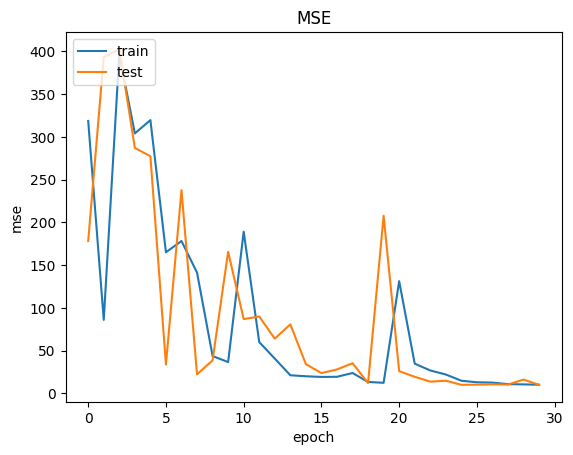

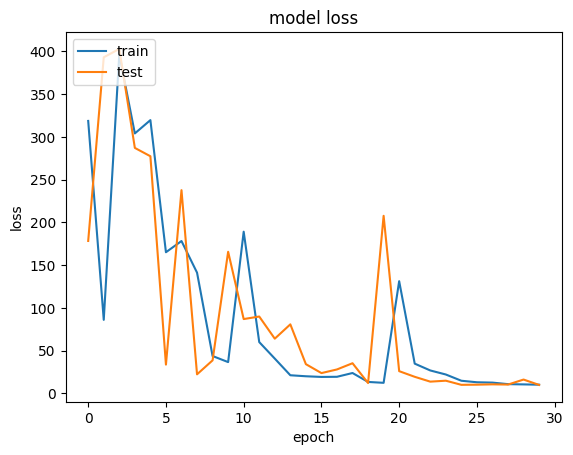

In [28]:
plot_mse(history.history)
plot_loss(history.history)

The loss is diverging. The learning rate is high.

- Explain learning Rate

### Model 2: With Lower Learning Rate

In [29]:
tf.keras.backend.clear_session()

model = models.Sequential()

model.add(Dense(64, input_shape=(train_X.shape[1],)))

model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))

In [30]:
sgd = SGD(learning_rate=0.001)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

In [31]:
%%time

EPOCHS = 100

history = model.fit(
    train_X,
    train_y,  # prepared data
    epochs=EPOCHS,
    validation_data=(test_X, test_y),
)

Epoch 1/100
9/9 [==============================] - 1s 24ms/step - loss: 528.1963 - mse: 528.1963 - val_loss: 329.6320 - val_mse: 329.6320
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 200.9188 - mse: 200.9188 - val_loss: 51.7852 - val_mse: 51.7852
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 62.7187 - mse: 62.7187 - val_loss: 26.7712 - val_mse: 26.7712
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 41.7165 - mse: 41.7165 - val_loss: 19.1885 - val_mse: 19.1885
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 33.0219 - mse: 33.0219 - val_loss: 17.4069 - val_mse: 17.4069
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 27.9523 - mse: 27.9523 - val_loss: 17.9657 - val_mse: 17.9657
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 23.7841 - mse: 23.7841 - val_loss: 16.9275 - val_mse: 16.9275
Epoch 8/100
9/9 [==============================] - 0s 6ms/step

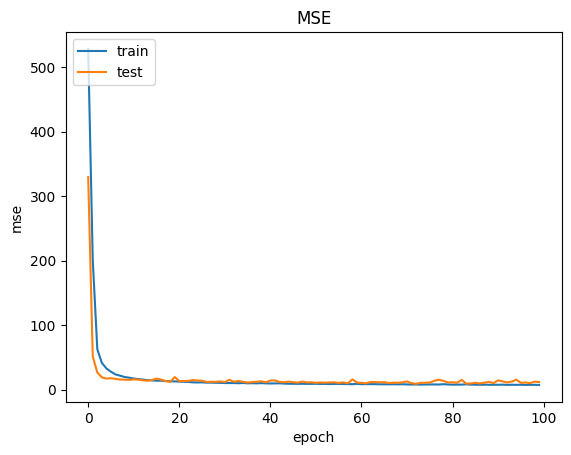

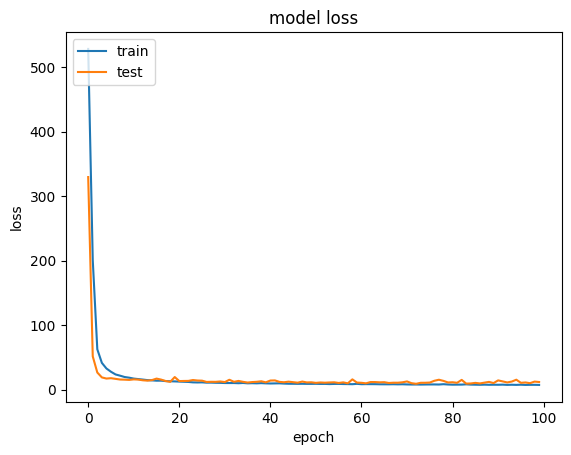

In [32]:
plot_mse(history.history)
plot_loss(history.history)

## Participant Exercise: 1

1. Change the activation functions to a) sigmoid and b) tanh and build the model
2. Add more neurons to the model
3. Add model layers to the model

Print the model summary and validation loss from the last epoch.

### Model Prediction and Measure Accuracy

In [33]:
pred_y = model.predict(test_X)

3/3 [==============================] - 0s 3ms/step


In [34]:
from sklearn import metrics

In [35]:
np.sqrt(metrics.mean_squared_error( test_y, pred_y ))

3.4723994494434707

## Using Callbacks

In [36]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

In [37]:
callbacks_list = [ReduceLROnPlateau(monitor='val_loss',
                                    factor=0.1,
                                    patience=3),
                  EarlyStopping(monitor='val_loss',
                                patience=6),
                  ModelCheckpoint(filepath='boston_house_model.h5',
                                  save_format='tf',
                                  monitor='val_loss',
                                  save_best_only=True)]

In [38]:
tf.keras.backend.clear_session()

model = models.Sequential()

model.add(Dense(64, input_shape=(train_X.shape[1],)))

model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))

In [39]:
sgd = SGD(learning_rate=0.005)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

In [40]:
%%time

EPOCHS = 100

history = model.fit(
    train_X,
    train_y,  # prepared data
    epochs=EPOCHS,
    callbacks = callbacks_list,
    validation_data=(test_X, test_y),
)

Epoch 1/100
9/9 [==============================] - 1s 28ms/step - loss: 287.0571 - mse: 287.0571 - val_loss: 58.5840 - val_mse: 58.5840 - lr: 0.0050
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 80.1732 - mse: 80.1732 - val_loss: 94.6206 - val_mse: 94.6206 - lr: 0.0050
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 35.5474 - mse: 35.5474 - val_loss: 13.7087 - val_mse: 13.7087 - lr: 0.0050
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 27.1009 - mse: 27.1009 - val_loss: 12.9595 - val_mse: 12.9595 - lr: 0.0050
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 31.4995 - mse: 31.4995 - val_loss: 12.6134 - val_mse: 12.6134 - lr: 0.0050
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 16.1457 - mse: 16.1457 - val_loss: 20.3466 - val_mse: 20.3466 - lr: 0.0050
Epoch 7/100
9/9 [==============================] - 0s 9ms/step - loss: 13.3543 - mse: 13.3543 - val_loss: 19.0458 - val_

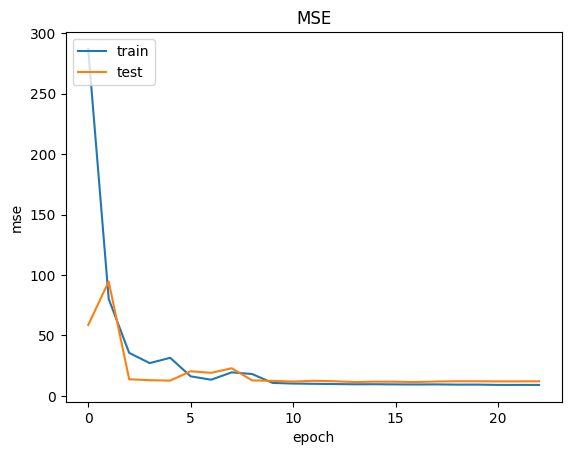

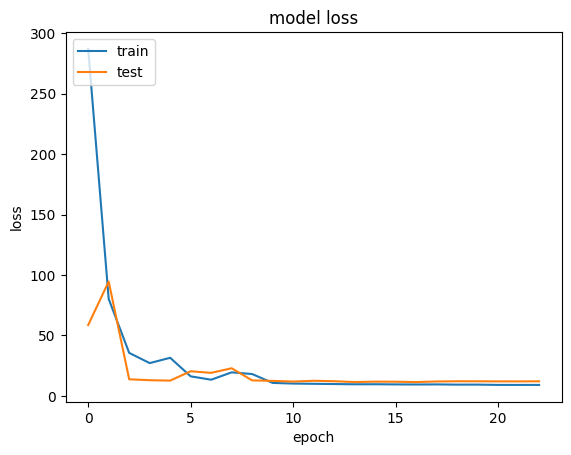

In [41]:
plot_mse(history.history)
plot_loss(history.history)

### Saving the model

In [42]:
model.save('boston_house_model.h5')

## Loading Model and Making Prediction

In [43]:
new_model = keras.models.load_model('boston_house_model.h5')

In [44]:
test_X[0:1]

array([[-0.43972209, -0.49737352,  0.11192699, -0.23570226,  0.15058645,
        -0.22400612,  0.29568178, -0.72637902, -0.99031588, -0.79900328,
         1.16455837,  0.43752692, -0.47255256]])

In [45]:
house_price_pred = model.predict(test_X[0:1])

1/1 [==============================] - 0s 61ms/step


In [46]:
house_price_pred[0]

array([22.04289], dtype=float32)

The new data always need to be normalized with training data parameters (mean and standard deviation).